In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import mean_squared_error

In [2]:
training_set = pd.read_csv("../instructor/Google_Stock_Price_Train.csv")

In [3]:
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set.shape

(1258, 6)

In [5]:
training_set = training_set.iloc[:,1:2].values

In [6]:
#feature scaling
# as lstm use sigmoid it is better to scale min max 
# than standard scaler

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
sc = MinMaxScaler()

In [12]:
training_set_scaled = sc.fit_transform(training_set)

In [13]:
#X_train = training_Set[:-1]

In [14]:
#y_train = training_Set[1:]

In [15]:
# Creating a data structure with 20 timesteps and t+1 output
X_train = []
y_train = []
for i in range(20, 1258):
    X_train.append(training_set_scaled[i-20:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
#Reshaping
# /Keras RNN layer expects input in 3 col 
# 

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 

In [18]:
# making prections and visualizing the results
test_Set = pd.read_csv("../instructor/Google_Stock_Price_Test.csv")
real_stock_price = test_Set.iloc[:,1:2].values
# getting the prediction of stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20,1,1))

def visualize(regressor):
    predicted_stock_price = regressor.predict(inputs)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    # visualizing the results
    plt.plot(real_stock_price, color='red',label='Real Google Stock Price')
    plt.plot(predicted_stock_price, color='blue',label='Predicted Google Stock Price')
    plt.title("Google Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

In [19]:
real_stock_price_train = pd.read_csv("../instructor/Google_Stock_Price_Train.csv")
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values
def get_rmse(regressor):
    predicted_stock_price_train = regressor.predict(X_train)
    predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)
    plt.plot(real_stock_price_train, color='red',label='Real Google Stock Price')
    plt.plot(predicted_stock_price_train, color='blue',label='Predicted Google Stock Price')
    plt.title("Google Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()
    return  math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))

In [20]:
#keras model

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [22]:
regressor1 = Sequential()
# input layer and lstm layer
# 4 memory cells
regressor1.add(LSTM(units = 1, activation='sigmoid',input_shape=(None,1)))
# adding output layer
# 1 output ie, price at time t+1
regressor1.add(Dense(units=1))
# compiling the RNN
regressor1.compile(optimizer='adam',loss='mean_squared_error')
#fitting the trainingdata
regressor1.fit(X_train,y_train,batch_size=32,epochs=200)



Epoch 1/200
1238/1238 [==============================] - 1s - loss: 0.3002     
Epoch 2/200
1238/1238 [==============================] - 0s - loss: 0.2507     
Epoch 3/200
1238/1238 [==============================] - 0s - loss: 0.2081     
Epoch 4/200
1238/1238 [==============================] - 0s - loss: 0.1707     
Epoch 5/200
1238/1238 [==============================] - 0s - loss: 0.1384     
Epoch 6/200
1238/1238 [==============================] - 0s - loss: 0.1118     
Epoch 7/200
1238/1238 [==============================] - 0s - loss: 0.0911     
Epoch 8/200
1238/1238 [==============================] - 0s - loss: 0.0773     
Epoch 9/200
1238/1238 [==============================] - 0s - loss: 0.0698     
Epoch 10/200
1238/1238 [==============================] - 0s - loss: 0.0660     
Epoch 11/200
1238/1238 [==============================] - 0s - loss: 0.0636     
Epoch 12/200
1238/1238 [==============================] - 0s - loss: 0.0619     
Epoch 13/200
1238/1238 [=============

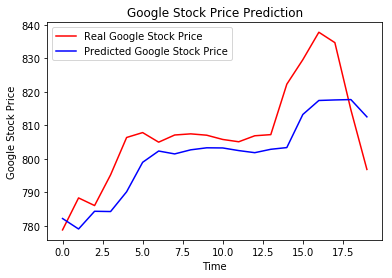

In [24]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price for February 1st 2012 - January 31st 2017
dataset_test = pd.read_csv('../instructor/Google_Stock_Price_Test.csv')
test_set = dataset_test.iloc[:,1:2].values
real_stock_price = np.concatenate((training_set[0:1258], test_set), axis = 0)

# Getting the predicted stock price of 2017
scaled_real_stock_price = sc.fit_transform(real_stock_price)
inputs = []
for i in range(1258, 1278):
    inputs.append(scaled_real_stock_price[i-20:i, 0])
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
predicted_stock_price = regressor1.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price[1258:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 3, return_sequences = True, input_shape = (None, 1)))

# Adding a second LSTM layer
regressor.add(LSTM(units = 3, return_sequences = True))

# Adding a third LSTM layer
regressor.add(LSTM(units = 3, return_sequences = True))

# Adding a fourth LSTM layer
regressor.add(LSTM(units = 3))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Part 3 - Making the predictions and visualising the results

# Getting the real stock price for February 1st 2012 - January 31st 2017
dataset_test = pd.read_csv('../instructor/Google_Stock_Price_Test.csv')
test_set = dataset_test.iloc[:,1:2].values
real_stock_price = np.concatenate((training_set[0:1258], test_set), axis = 0)

# Getting the predicted stock price of 2017
scaled_real_stock_price = sc.fit_transform(real_stock_price)
inputs = []
for i in range(1258, 1278):
    inputs.append(scaled_real_stock_price[i-60:i, 0])
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price[1258:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Epoch 1/100
1238/1238 [==============================] - 5s - loss: 0.1269     
Epoch 2/100
1238/1238 [==============================] - 2s - loss: 0.0307     
Epoch 3/100
1238/1238 [==============================] - 2s - loss: 0.0040     
Epoch 4/100
1238/1238 [==============================] - 2s - loss: 0.0026     
Epoch 5/100
1238/1238 [==============================] - 2s - loss: 0.0024     
Epoch 6/100
1238/1238 [==============================] - 2s - loss: 0.0022     
Epoch 7/100
1238/1238 [==============================] - 2s - loss: 0.0023     
Epoch 8/100
1238/1238 [==============================] - 2s - loss: 0.0022     
Epoch 9/100
1238/1238 [==============================] - 2s - loss: 0.0022     
Epoch 10/100
1238/1238 [==============================] - 2s - loss: 0.0021     
Epoch 11/100
1238/1238 [==============================] - 2s - loss: 0.0022     
Epoch 12/100
1238/1238 [==============================] - 2s - loss: 0.0020     
Epoch 13/100
1238/1238 [=============